<a href="https://colab.research.google.com/github/abhaymamadapur/CE888/blob/main/lab%208/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset from zip file

In [1]:
from urllib.request import urlretrieve
urlretrieve("https://github.com/sagihaider/CE888_2021/blob/48596dc985737423025dfbe3163dc26fdb3a08aa/Lab_8/data.zip")

('/tmp/tmpou2x96zj', <http.client.HTTPMessage at 0x7fa84288ba10>)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile
fileNamePath = "/content/drive/MyDrive/Colab_Notebooks/Lab_8/data.zip"

with ZipFile(fileNamePath, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
# Get all the paths

path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print("No of files in cats",file_count)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print("No of files in dogs",file_count)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print("No of files in horses",file_count)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print("No of files in Humans",file_count)

No of files in cats 202
No of files in dogs 202
No of files in horses 202
No of files in Humans 202


In [5]:
# Make new base directory
original_dataset_dir_cats = "/content/data/cats"
original_dataset_dir_dogs = "/content/data/dogs"
original_dataset_dir_horses = "/content/data/horses"
original_dataset_dir_humans = "/content/data/Humans"
base_dir = "/content/cats_dogs_horses_human"
os.mkdir(base_dir)

In [6]:
train_directory = os.path.join(base_dir, 'train')
os.mkdir(train_directory)

validation_directory = os.path.join(base_dir, 'validation')
os.mkdir(validation_directory)

test_directory = os.path.join(base_dir, 'test')
os.mkdir(test_directory)

In [8]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_directory, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)

import shutil
fnames = ['horse-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(train_directory, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(train_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)

In [9]:
path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/validation"))
file_count = len(files)
print("No of validation files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/test"))
file_count = len(files)
print("No of test files ",file_count)

No of train files  560
No of validation files  124
No of test files  120


In [10]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [11]:
def label_img(img):
  #print(img)
  if img.find('-')!=-1:
      #print(img)
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3
      
  else :
      word_label = img.split('.')[0]
      if word_label == 'dog': return 1
      elif word_label == 'cat': return 0

def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
       
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [12]:
train_X, train_y = createDataSplitSet(train_directory)
val_X, val_y = createDataSplitSet(validation_directory)
test_X, test_y = createDataSplitSet(test_directory)

### Import tensorflow keras libraries

In [13]:

from tensorflow.keras.applications import VGG16,VGG19,InceptionV3
from tensorflow.keras.layers import Dense, Input, Flatten,Dropout,Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras import layers 

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, roc_auc_score


In [14]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

### VGG19 FE

In [15]:

model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

574717952/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [16]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [18]:

my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [19]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 41s 109ms/step - loss: 1.3690 - acc: 0.3819 - val_loss: 0.7182 - val_acc: 0.7661
Epoch 2/10
56/56 [==============================] - 4s 78ms/step - loss: 0.6572 - acc: 0.7575 - val_loss: 0.5939 - val_acc: 0.8306
Epoch 3/10
56/56 [==============================] - 4s 79ms/step - loss: 0.5756 - acc: 0.7954 - val_loss: 0.5446 - val_acc: 0.7903
Epoch 4/10
56/56 [==============================] - 4s 80ms/step - loss: 0.4976 - acc: 0.8068 - val_loss: 0.5363 - val_acc: 0.7823
Epoch 5/10
56/56 [==============================] - 5s 81ms/step - loss: 0.4258 - acc: 0.8368 - val_loss: 0.4738 - val_acc: 0.8387
Epoch 6/10
56/56 [==============================] - 5s 82ms/step - loss: 0.3790 - acc: 0.8775 - val_loss: 0.4483 - val_acc: 0.8387
Epoch 7/10
56/56 [==============================] - 5s 83ms/step - loss: 0.3375 - acc: 0.8861 - val_loss: 0.4863 - val_acc: 0.8387
Epoch 8/10
56/56 [==============================] - 5s 83ms/step - loss: 0.3652 -

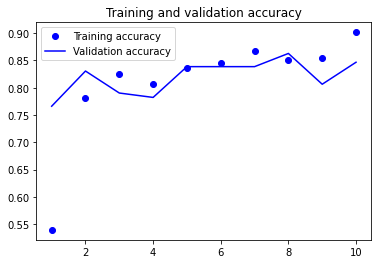

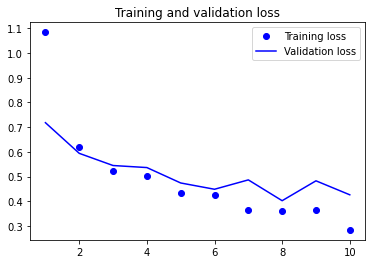

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.9017857313156128
Val Accuracy:	 0.8467742204666138
Test Accuracy:	 0.8916666666666667
Precision:	 0.8918242491657398
Recall:		 0.8916666666666667
F1 Score:	 0.8914976382328426


###VGG19 FT

In [22]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='sigmoid', name='output')(x) 
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False


model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

In [25]:
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [26]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 6s 88ms/step - loss: 1.5477 - acc: 0.5196 - val_loss: 0.6266 - val_acc: 0.7339
Epoch 2/10
56/56 [==============================] - 5s 86ms/step - loss: 0.2534 - acc: 0.9166 - val_loss: 0.3180 - val_acc: 0.8790
Epoch 3/10
56/56 [==============================] - 5s 87ms/step - loss: 0.0827 - acc: 0.9789 - val_loss: 0.3381 - val_acc: 0.8871
Epoch 4/10
56/56 [==============================] - 5s 88ms/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.3402 - val_acc: 0.8871
Epoch 5/10
56/56 [==============================] - 5s 88ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3482 - val_acc: 0.9032
Epoch 6/10
56/56 [==============================] - 5s 87ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3456 - val_acc: 0.9032
Epoch 7/10
56/56 [==============================] - 5s 86ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3448 - val_acc: 0.9032


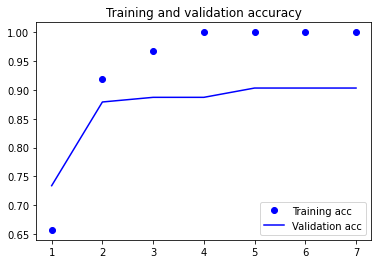

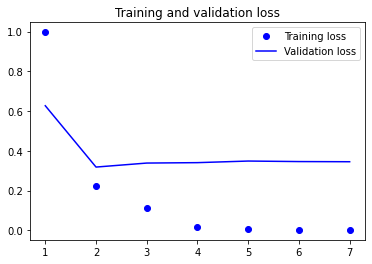

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 1.0
Val Accuracy:	 0.9032257795333862
Test Accuracy:	 0.825
Precision:	 0.8631628787878788
Recall:		 0.825
F1 Score:	 0.8152411304585218
